In [75]:
import time

## Simple timer function

In [85]:
def timer(func, *args, times=1000):
    start = time.perf_counter()
    for i in range(times):
        func(*args)
    return time.perf_counter() - start

In [66]:
timer(pow, 1233, 12323)

1.2426736980014539

In [71]:
benchmark = [(n,timer(pow, 222, 6666)) for n in range(25)]
benchmark2 = [(n,timer(pow, 333+n, 6565)) for n in range(25)]

In [72]:
benchmark

[(0, 0.29221509499984677),
 (1, 0.2709045179981331),
 (2, 0.2726686989990412),
 (3, 0.2733515410000109),
 (4, 0.2723182830013684),
 (5, 0.27003204399807146),
 (6, 0.27034882999942056),
 (7, 0.2716363369981991),
 (8, 0.2723461759997008),
 (9, 0.3059651629992004),
 (10, 0.27030230600212235),
 (11, 0.2699816690001171),
 (12, 0.27055067300170776),
 (13, 0.27441384099802235),
 (14, 0.28047785800299607),
 (15, 0.2703985459993419),
 (16, 0.27998123400175245),
 (17, 0.27027814100074465),
 (18, 0.2700905759993475),
 (19, 0.2702514649972727),
 (20, 0.3286759059992619),
 (21, 0.27338326400058577),
 (22, 0.27761154000108945),
 (23, 0.27948460100014927),
 (24, 0.2918546510009037)]

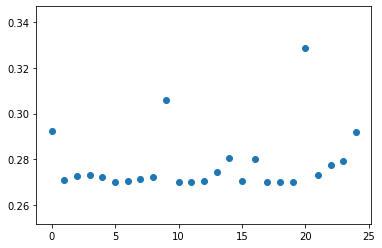

In [73]:
from matplotlib import pyplot as plt
x,y = zip(*benchmark)
plt.scatter(x,y) # looks like it uses cache so consecutive calls are pretty similar

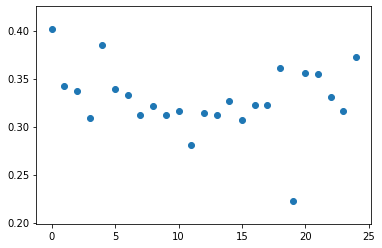

In [74]:
x1,y1 = zip(*benchmark2)
plt.scatter(x1,y1) # results are "randomized" so time is slightly differs

## Timing iterators

In [105]:
import sys
reps = 10000
replist = list(range(reps))

### Test built-in function

In [114]:
def forLoop():
    res = []
    for x in replist:
        res.append(abs(x))
    return res

def listComp():
    return [abs(x) for x in replist]

def mapCall():
    return list(map(abs, replist))

def genExp():
    return list((abs(x) for x in replist))

def genFunc():
    def gen():
        for x in replist:
            yield abs(x)
    return list(gen())

In [107]:
results = []
for test in (forLoop, listComp, mapCall, genExp, genFunc):
    results.append((test.__name__, timer(test, times=1000)))

In [108]:
sys.version

'3.7.4 (default, Aug 13 2019, 20:35:49) \n[GCC 7.3.0]'

In [109]:
results

[('forLoop', 0.789492326999607),
 ('listComp', 0.47120119399914984),
 ('mapCall', 0.20366575799926068),
 ('genExp', 0.6055020370004058),
 ('genFunc', 0.6101745019986993)]

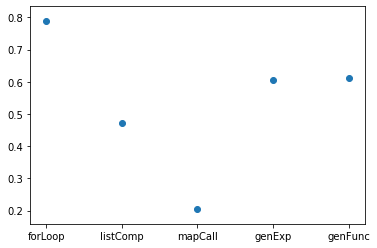

In [110]:
x,y = zip(*results)
plt.scatter(x, y)

In [116]:
def forLoop2():
    res = []
    for x in replist:
        res.append(x+10)
    return res

def listComp2():
    return [x+10 for x in replist]

def mapCall2():
    return list(map((lambda x: x+10), replist))

def genExp2():
    return list((x+10 for x in replist))

def genFunc2():
    def gen():
        for x in replist:
            yield x+10
    return list(gen())

In [119]:
results2 = []
for test in (forLoop2, listComp2, mapCall2, genExp2, genFunc2):
    results2.append((test.__name__, timer(test, times=1000)))

In [120]:
results2

[('forLoop2', 0.6714103179983795),
 ('listComp2', 0.36961946900191833),
 ('mapCall2', 0.6926771920007013),
 ('genExp2', 0.5137285540004086),
 ('genFunc2', 0.5122542319986678)]

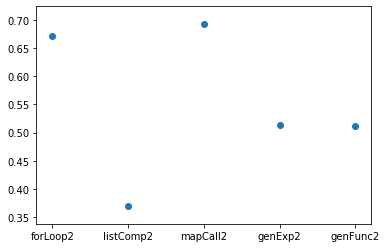

In [121]:
x,y = zip(*results2)
plt.scatter(x, y)

## timeit function

In [1]:
import timeit

In [4]:
timeit.repeat(stmt="[x ** 2 for x in range(1000)]", number=1000, repeat=5)

[0.2309483569999884,
 0.21111661700001605,
 0.20742863499981468,
 0.2061104100000648,
 0.20610616800013304]

In [9]:
min(timeit.repeat(stmt="l = range(10000); l2 = [x ** 2 for x in l]", number=1000, repeat=5))

2.096034943000177

In [10]:
min(timeit.repeat(setup="l = range(10000)", stmt="l2 = [x ** 2 for x in l]", number=1000, repeat=5))

2.088700096999901